## IN4640 Assignment 1
### Intensity Transformations and Neighborhood Filtering
### Task 05

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

In [3]:
sigma = 2
kernel_size = 5
ax = np.linspace(-(kernel_size - 1) / 2., (kernel_size - 1) / 2., kernel_size)
gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
kernel_5x5 = np.outer(gauss, gauss)
kernel_5x5 = kernel_5x5 / np.sum(kernel_5x5)

print("5x5 Gaussian Kernel (sigma=2):")
print(kernel_5x5)

5x5 Gaussian Kernel (sigma=2):
[[0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.03832756 0.05576627 0.06319146 0.05576627 0.03832756]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]]


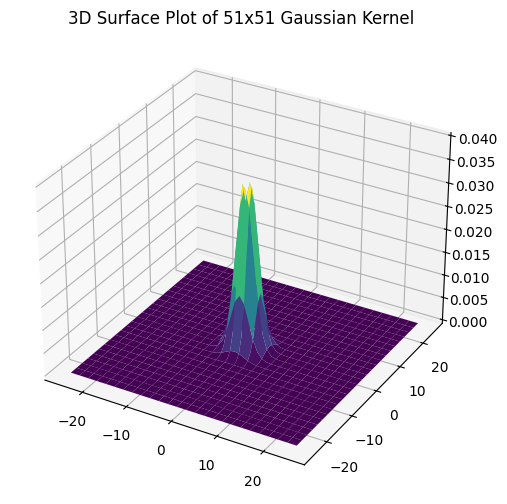

In [4]:
sigma_vis = 2
size_vis = 51
x = np.linspace(-(size_vis - 1) / 2., (size_vis - 1) / 2., size_vis)
y = np.linspace(-(size_vis - 1) / 2., (size_vis - 1) / 2., size_vis)
x, y = np.meshgrid(x, y)

kernel_51x51 = np.exp(-0.5 * (np.square(x) + np.square(y)) / np.square(sigma_vis))
kernel_51x51 = kernel_51x51 / np.sum(kernel_51x51)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, kernel_51x51, cmap='viridis')
plt.title('3D Surface Plot of 51x51 Gaussian Kernel')
plt.show()

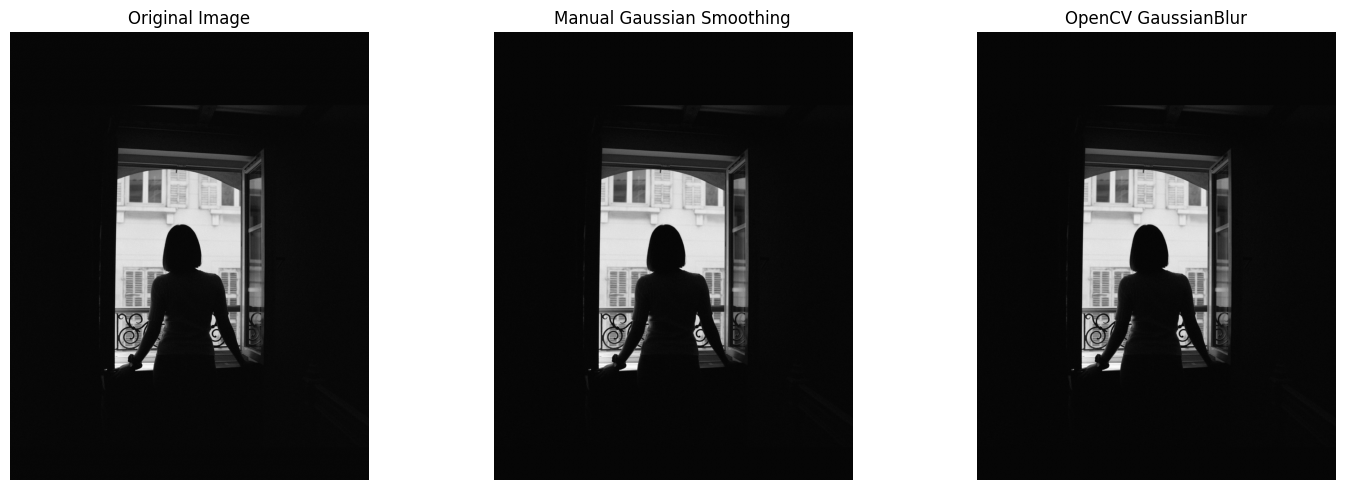

In [5]:
img_path = 'assets/looking_out.jpg'

if os.path.exists(img_path):
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    manual_smooth = cv2.filter2D(img_gray, -1, kernel_5x5)

    opencv_smooth = cv2.GaussianBlur(img_gray, (5, 5), 2)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(manual_smooth, cmap='gray')
    plt.title('Manual Gaussian Smoothing')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(opencv_smooth, cmap='gray')
    plt.title('OpenCV GaussianBlur')
    plt.axis('off')

    plt.tight_layout()
    plt.show()